In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Importing the dataset
df = pd.read_excel("../employee-productivity-performance/Dataset/employee_performance.xlsx")


print(df.head(5))
print(df.info())
print(df.describe())

  Employee ID Department  Work Hours  Projects Completed  Sick Days  \
0    2ed469ca      Sales          45                   5          2   
1    d6706b01    Finance          48                   2          6   
2    abb51851    Finance          56                   1          7   
3    8c676111         IT          34                   4          3   
4    fdd26917         IT          43                   0          2   

   Performance Score  
0               4.33  
1               2.14  
2               2.45  
3               2.86  
4               4.92  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employee ID         1000 non-null   object 
 1   Department          1000 non-null   object 
 2   Work Hours          1000 non-null   int64  
 3   Projects Completed  1000 non-null   int64  
 4   Sick Days           1000 non-nu

In [56]:
# Check missing values
print(df.info())  # See data types and null values
print(df.isnull().sum())  # Count of missing values in each column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employee ID         1000 non-null   object 
 1   Department          1000 non-null   object 
 2   Work Hours          1000 non-null   int64  
 3   Projects Completed  1000 non-null   int64  
 4   Sick Days           1000 non-null   int64  
 5   Performance Score   1000 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB
None
Employee ID           0
Department            0
Work Hours            0
Projects Completed    0
Sick Days             0
Performance Score     0
dtype: int64


Data Cleaning and Preprocessing

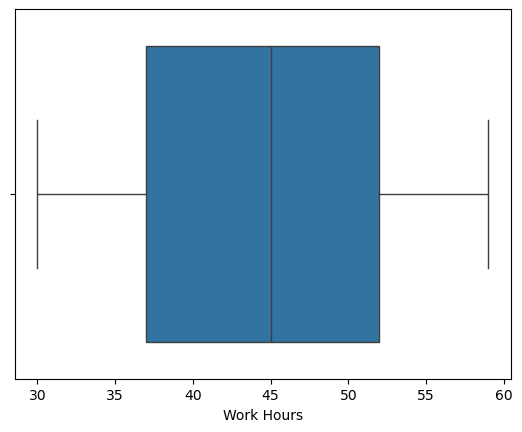

In [57]:
df['Performance Score'] = df['Performance Score'].fillna(df['Performance Score'].mean())

# Categorize work hours in to groups
bins = [0, 20, 40, 60, np.inf]  # Example threshold values
labels = ['Low', 'Medium', 'High', 'Very High']
df['Work Hour Category'] = pd.cut(df['Work Hours'], bins=bins, labels=labels)



# check for duplicate values
df.drop_duplicates(inplace=True)

#check for outliers in work hours
sns.boxplot(x=df['Work Hours'])
plt.show()


Data Analysis

In [58]:

# Checking for correlation between sick days and performance score
correlation = df[['Sick Days', 'Performance Score']].corr()
print(correlation)


                   Sick Days  Performance Score
Sick Days           1.000000           0.036358
Performance Score   0.036358           1.000000


In [59]:
# Identifying employees who are overworked
overworked = df[(df['Work Hours'] > 50) & (df['Performance Score'] < 50)]
print(overworked)


    Employee ID Department  Work Hours  Projects Completed  Sick Days  \
2      abb51851    Finance          56                   1          7   
11     bb2138c8         HR          55                   6          0   
12     563d7fd6    Finance          54                   5          5   
15     8cc89a1c         IT          55                   3          7   
18     ea852e45  Marketing          55                   0          1   
..          ...        ...         ...                 ...        ...   
989    bb196290         HR          54                   6          1   
993    70131be4         IT          55                   7          9   
995    427ca23f  Marketing          55                   1          0   
997    b6ac2b79         IT          53                   5          3   
998    36f88a99    Finance          57                   0          9   

     Performance Score Work Hour Category  
2                 2.45               High  
11                1.90             

Data Visualization


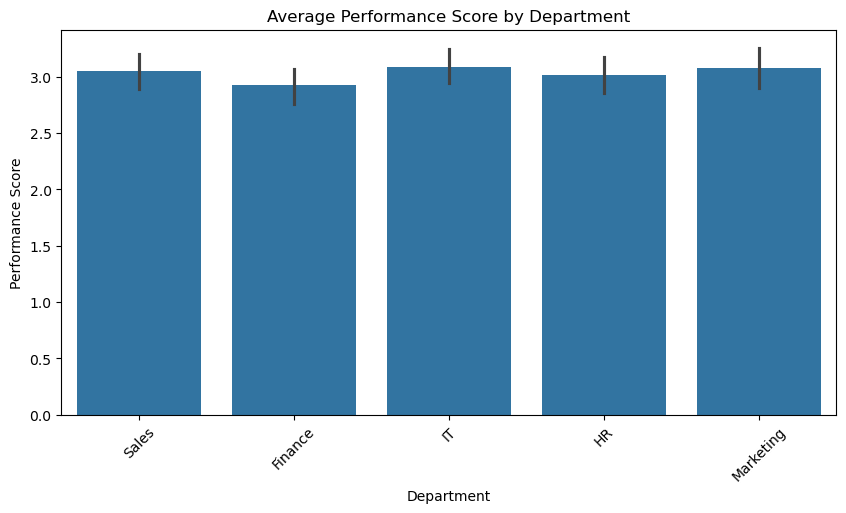

In [60]:
# Bar Chart: Department with the highest productivity
plt.figure(figsize=(10,5))
sns.barplot(x=df['Department'], y=df['Performance Score'], estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Average Performance Score by Department")
plt.show()


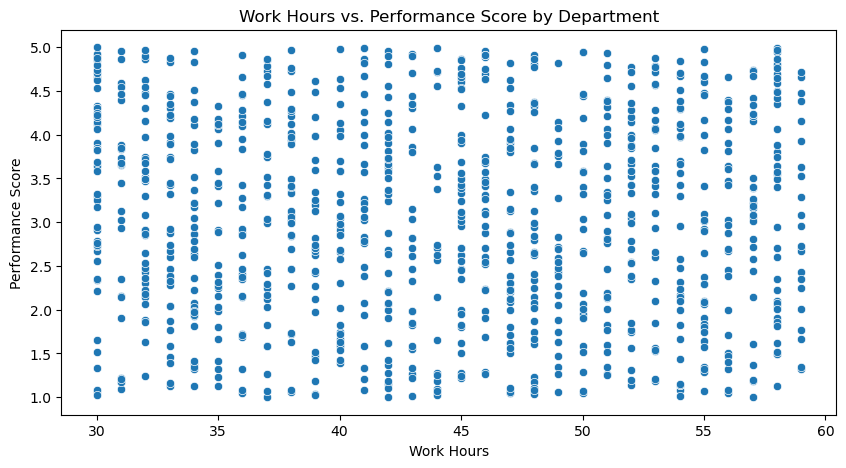

In [61]:
# Scatter Plot: Work Hours vs. Performance Score
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Work Hours'], y=df['Performance Score'])
plt.title("Work Hours vs. Performance Score by Department")
plt.show()

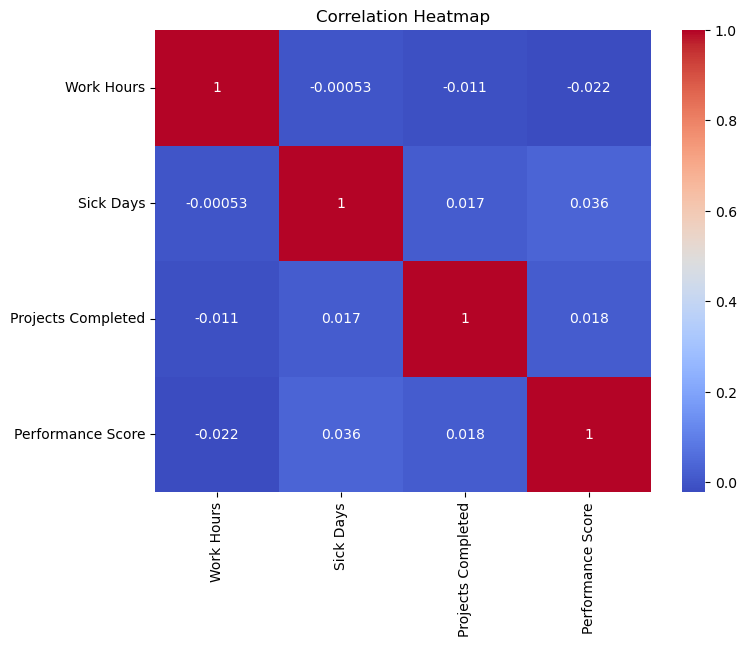

In [62]:
# Heatmap: Correlation between key variables
plt.figure(figsize=(8,6))
sns.heatmap(df[['Work Hours', 'Sick Days', 'Projects Completed', 'Performance Score']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [63]:
# Export the cleaned dataset
df.to_csv("cleaned_employee_performance.csv", index=False)
